# 手寫辨識機器學習

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Adam
from keras.utils import np_utils
from ipywidgets import interact_manual
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [31]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Normalization

In [32]:
x_train_1 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_1 = (x_test - x_test.min()) / (x_test.max()- x_test.min())

## Model1 : 

In [33]:
model1 = Sequential()
model1.add(Dense(4, input_dim=784))
model1.add(Activation('sigmoid'))
model1.add(Dense(2))
model1.add(Activation('elu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_13 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_14 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_15 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_1 = model1.fit(x_train_1, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.1965 - acc: 0.9219 - val_loss: 0.1694 - val_acc: 0.9332
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.1571 - acc: 0.9404 - val_loss: 0.1427 - val_acc: 0.9500
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1407 - acc: 0.9502 - val_loss: 0.1380 - val_acc: 0.9507
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1367 - acc: 0.9513 - val_loss: 0.1335 - val_acc: 0.9524
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1348 - acc: 0.9519 - val_loss: 0.1348 - val_acc: 0.9509
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.1343 - acc: 0.9520 - val_loss: 0.1358 - val_acc: 0.9517
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.1334 - acc: 0.9523 - val_loss: 0.1337 - val_acc

## Model2 : 

In [35]:
model2 = Sequential()
model2.add(Dense(4, input_dim=784))
model2.add(Activation('relu'))
model2.add(Dense(2))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_16 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_17 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_2 = model2.fit(x_train_1, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.2034 - acc: 0.9244 - val_loss: 0.1559 - val_acc: 0.9396
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.1525 - acc: 0.9428 - val_loss: 0.1447 - val_acc: 0.9445
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1456 - acc: 0.9461 - val_loss: 0.1441 - val_acc: 0.9454
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1429 - acc: 0.9476 - val_loss: 0.1407 - val_acc: 0.9476
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1409 - acc: 0.9482 - val_loss: 0.1441 - val_acc: 0.9459
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1393 - acc: 0.9492 - val_loss: 0.1414 - val_acc: 0.9481
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1387 - acc: 0.9498 - val_loss: 0.1382 - val_acc

In [37]:
predict1 = model1.predict_classes(x_test)
predict2 = model2.predict_classes(x_test)

In [38]:
def test1(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict1[測試編號])
def test2(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict2[測試編號])

In [39]:
interact_manual(test1, 測試編號=(0, 9999));
interact_manual(test2, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [40]:
score1 = model1.evaluate(x_test, y_test)
print('model1:')
print('loss:', score1[0])
print('正確率:', score1[1])
score2 = model2.evaluate(x_test, y_test)
print('model2:')
print('loss:', score2[0])
print('正確率:', score2[1])

10000/10000 [==============================] - 0s 31us/step
model1:
loss: 0.20143611764907837
正確率: 0.9303899828910828
10000/10000 [==============================] - 0s 27us/step
model2:
loss: 2.1535205448150636
正確率: 0.852179998588562


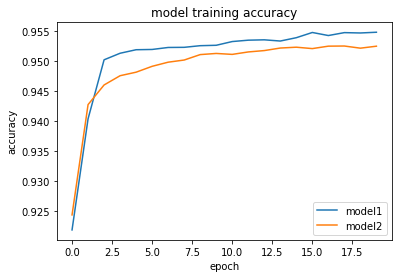

In [41]:
plt.plot(model_1.history["acc"])
plt.plot(model_2.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model1", "model2"], loc="best")
plt.show()

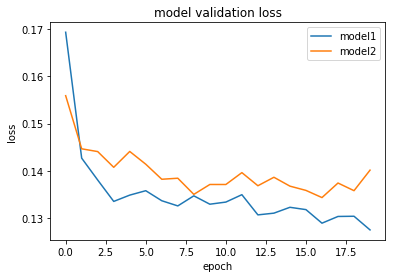

In [42]:
plt.plot(model_1.history["val_loss"])
plt.plot(model_2.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model1", "model2"], loc="best")
plt.show()